In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook


In [2]:
data_path = '..\data\interim\dataset_2017_2018[Selection].csv'
df_data = pd.read_csv(data_path)
df_data.sample(5)

,ID,Ano,Dia Juliano,Hora - minuto,Temperatura,Umidade
73293,73297,2018,155,1750,18.14,65.30
54204,54208,2018,23,410,20.89,80.00
11415,11415,2017,83,1400,29.59,34.27
70067,70071,2018,133,810,20.35,70.40
45540,45544,2017,328,10,17.95,80.70


In [3]:
def jdtodatestd (year_array,jday_array,time_array):
    date_array = []
    for i in range(len(year_array)):
        h_m = str(time_array[i])
        m = h_m[-2:]
        h = h_m[:-2]
        if( len(h_m) == 2 or h == '24' ):
            h = '00'
        jdate = str(year_array[i])+str(jday_array[i])+h+m
        fmt = '%Y%j%H%M'
        date_array.append(datetime.strptime(jdate, fmt))
    return np.array(date_array)
df_data['ts'] = jdtodatestd(df_data['Ano'].values,df_data['Dia Juliano'].values,df_data['Hora - minuto'].values)

<IPython.core.display.Javascript object>


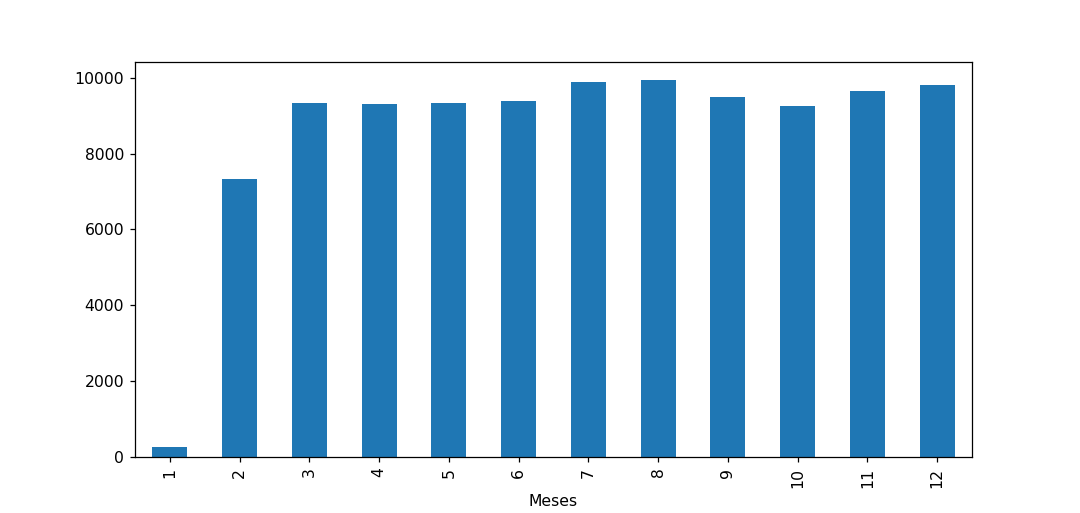

In [4]:
df_data['Meses'] = df_data['ts'].astype("datetime64")
df_data['Meses'].groupby(df_data['Meses'].dt.month).count().plot(kind="bar")

In [5]:
df_data = df_data.set_index('ts')
df_data = df_data[['Temperatura','Umidade']]

<IPython.core.display.Javascript object>


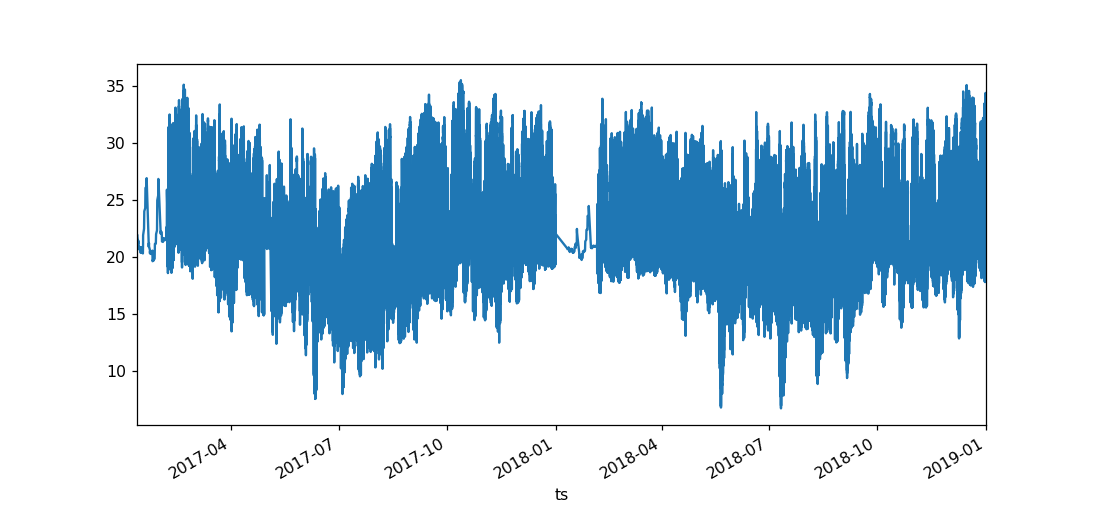

In [6]:
df_data['Temperatura'].plot()

In [7]:
RG = pd.date_range('2017-01-01', '2019-01-01', freq='H')
df_data_1H = df_data.resample('1H').mean()
df_data_1H = df_data_1H[df_data_1H.index.year != 2019]
df_data_1H = df_data_1H.reindex(RG)
df_data_1H = df_data_1H.drop(df_data_1H.index[-1])

In [8]:
df_data_1H.isna().sum()

Temperatura    1596
Umidade        1596
dtype: int64

<IPython.core.display.Javascript object>


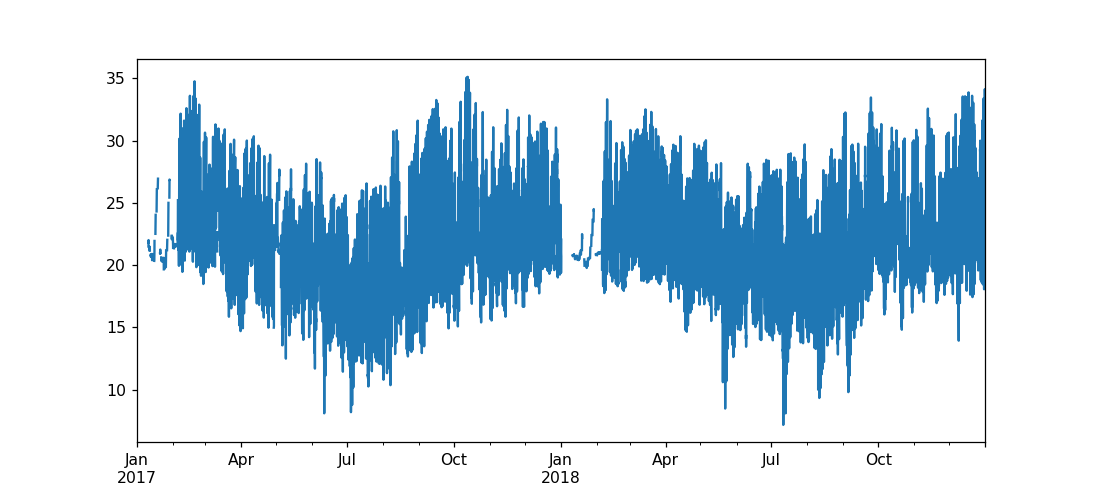

In [9]:
df_data_1H['Temperatura'].plot()

<IPython.core.display.Javascript object>


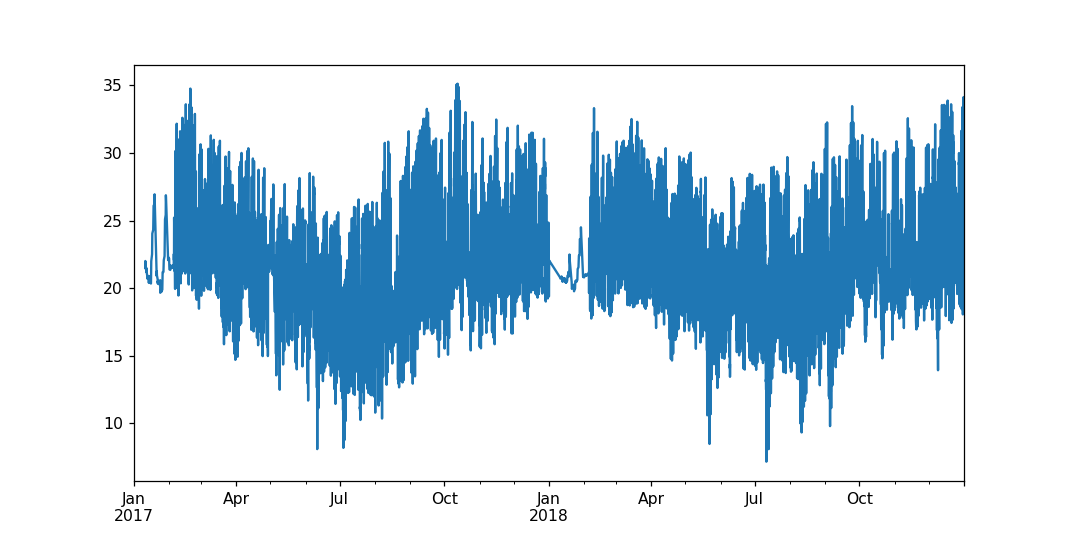

In [10]:
interpolated = df_data_1H.interpolate(method='linear')
interpolated['Temperatura'].plot()

In [393]:
A2017 = interpolated[(interpolated.index.month==12)&(interpolated.index.year==2017)]
A2018 = interpolated[(interpolated.index.month==12)&(interpolated.index.year==2018)]
A12PROM = (A2017.values+A2018.values)/2
interpolated[(interpolated.index.month==1)&(interpolated.index.year==2017)] = A12PROM
interpolated[(interpolated.index.month==1)&(interpolated.index.year==2018)] = A12PROM

<IPython.core.display.Javascript object>


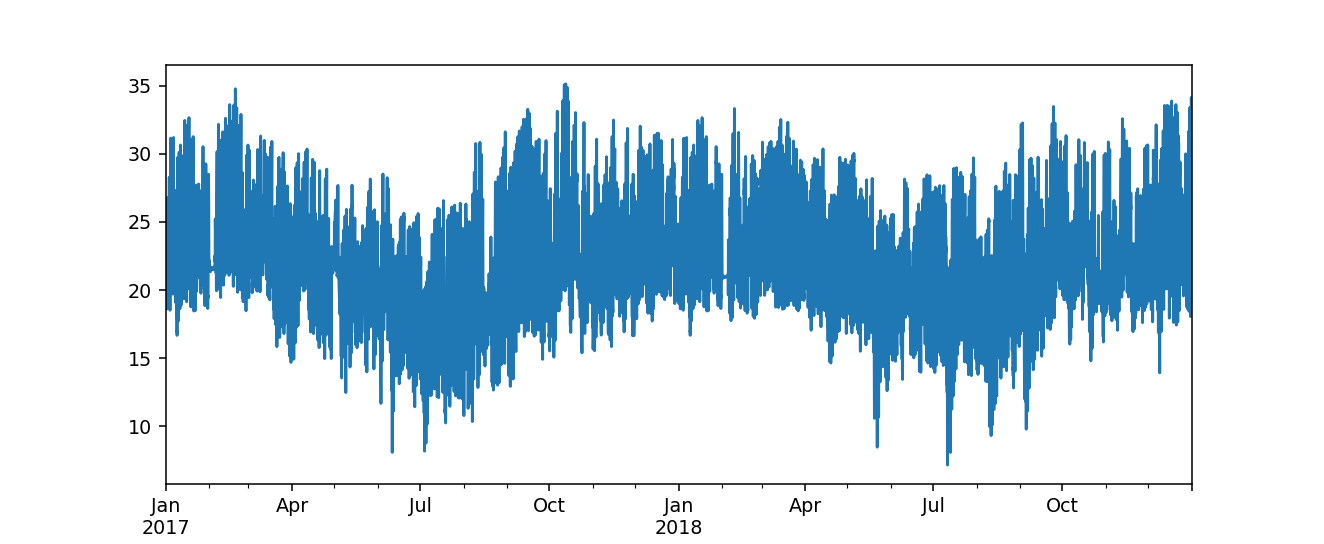

In [394]:
interpolated['Temperatura'].plot()

<IPython.core.display.Javascript object>


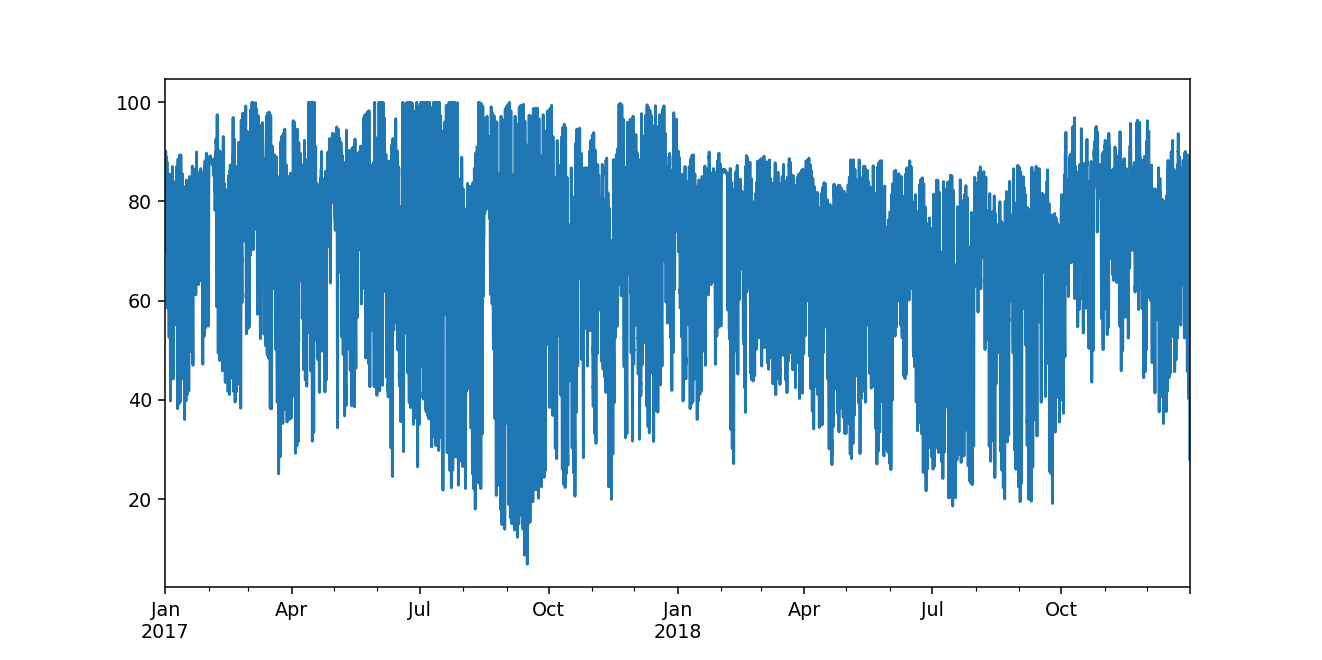

In [395]:
interpolated['Umidade'].plot()

In [396]:
interpolated.isna().sum()

Temperatura    0
Umidade        0
dtype: int64

In [397]:
interpolated.describe()

,Temperatura,Umidade
count,17520.000000,17520.000000
mean,21.941605,67.132705
std,4.132753,17.048744
min,7.170000,6.843167
25%,19.180000,55.529167
50%,21.491429,70.466190
75%,24.787321,80.500156
max,35.118333,100.000000


In [399]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-01-01 00:00:00 to 2018-12-31 23:00:00
Freq: H
Data columns (total 2 columns):
Temperatura    17520 non-null float64
Umidade        17520 non-null float64
dtypes: float64(2)
memory usage: 410.6 KB


In [403]:
interpolated.to_csv('..\data\interim\dataset_2017_2018[Preprocess].csv',index_label='ts')